In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 50)
sns.set_context("talk")

In [5]:
df = pd.read_csv('../data/processed/masculinity_clean.csv')

print("Data shape:", df.shape)
display(df.head())

Data shape: (1189, 98)


,Unnamed: 0,StartDate,EndDate,self_masculinity,importance_seen_masculine,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,pressure_unhealthy,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,...,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,rel_behavior_change,marital_status,q0025_0001,q0025_0002,q0025_0003,q0026,age_exact,q0029,q0030,income_bracket,region,device_type,race_group,ethnicity,education_detail,education,age_bracket,children_status,orientation,survey_weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,0,0,0,1,0,0,1.0,1,1,1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0.0,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,NaN,35 - 64,No children,NaN,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,1,0,0,0,0,0,1.0,1,1,1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,1,0.0,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,NaN,NaN,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,1,0,0,0,0,1,0.0,1,1,1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0.0,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,NaN,35 - 64,NaN,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,1,1,1,0,0,0,0.0,1,1,1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,NaN,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,NaN,NaN,NaN,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,0,0,1,0,0,0,1.0,1,1,1,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,1,0.0,Never married,Not selected,Not selected,No children,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,NaN,35 - 64,No children,Straight,1.033400


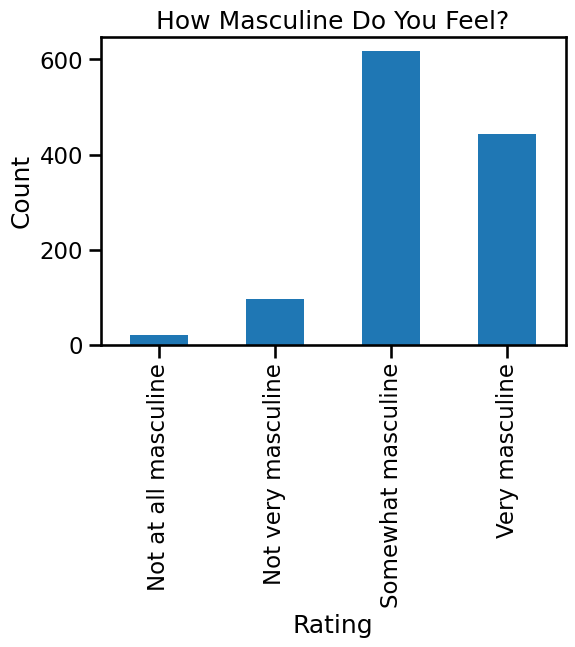

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
df['self_masculinity'] .value_counts() .sort_index() .plot.bar(ax=ax)

ax.set_title("How Masculine Do You Feel?")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.show()

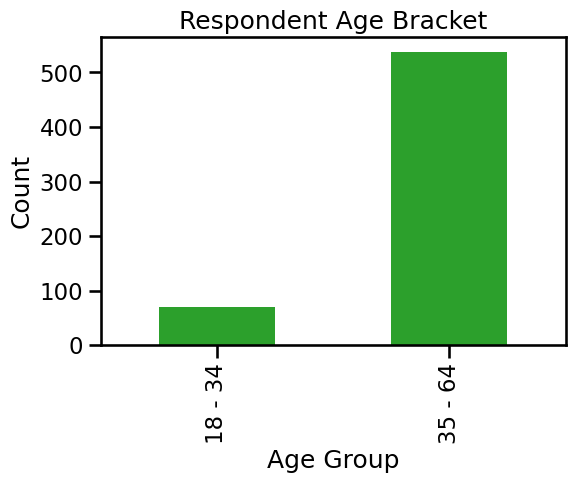

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
df['age_bracket'] .value_counts() .sort_index() .plot.bar(ax=ax, color='tab:green')

ax.set_title("Respondent Age Bracket")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
plt.show()

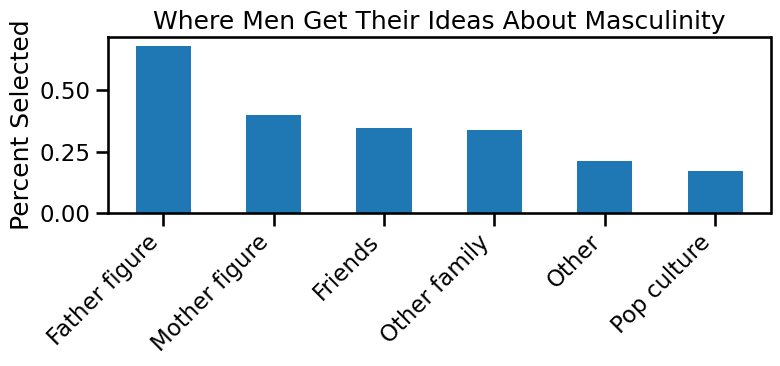

In [13]:
# Mapping column names to human-readable labels
q4_labels = {'q0004_0001': 'Father figure','q0004_0002': 'Mother figure','q0004_0003': 'Other family','q0004_0004': 'Pop culture','q0004_0005': 'Friends','q0004_0006': 'Other'}

q4_cols = list(q4_labels.keys())
src_pct = df[q4_cols].mean().sort_values(ascending=False)
src_pct = src_pct.rename(index=q4_labels)

fig, ax = plt.subplots(figsize=(8,4))
src_pct.plot.bar(ax=ax)
ax.set_title("Where Men Get Their Ideas About Masculinity")
ax.set_ylabel("Percent Selected")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

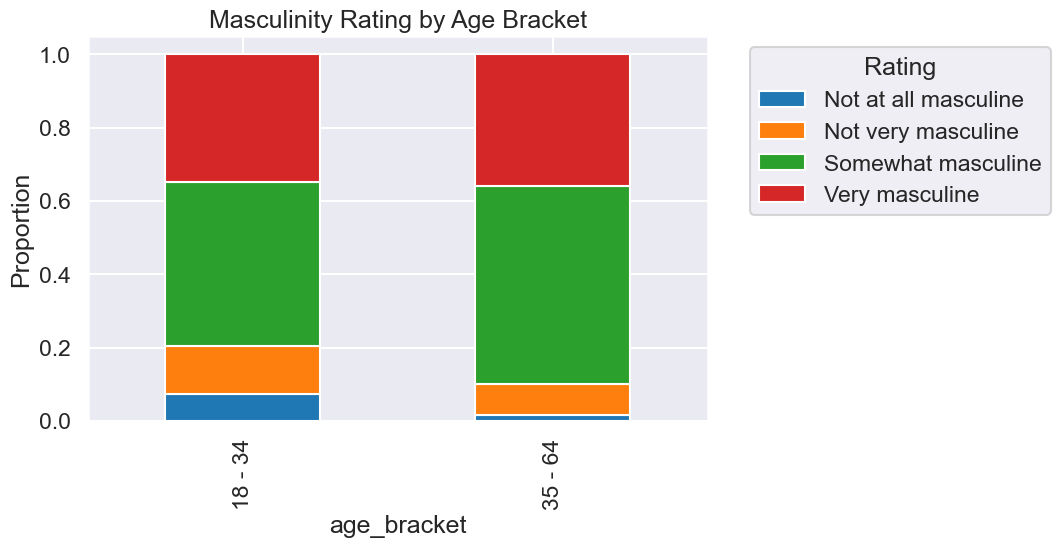

Chi‑square p‑value: 0.0139


In [6]:
ct = pd.crosstab(df['age_bracket'], df['self_masculinity'], normalize='index')
fig, ax = plt.subplots(figsize=(8,5))
ct.plot.bar(stacked=True, ax=ax)
ax.set_title("Masculinity Rating by Age Bracket")
ax.set_ylabel("Proportion")
plt.legend(title="Rating", bbox_to_anchor=(1.05,1))
plt.show()

# Chi‑square test
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['age_bracket'], df['self_masculinity']))
print(f"Chi‑square p‑value: {p:.4f}")

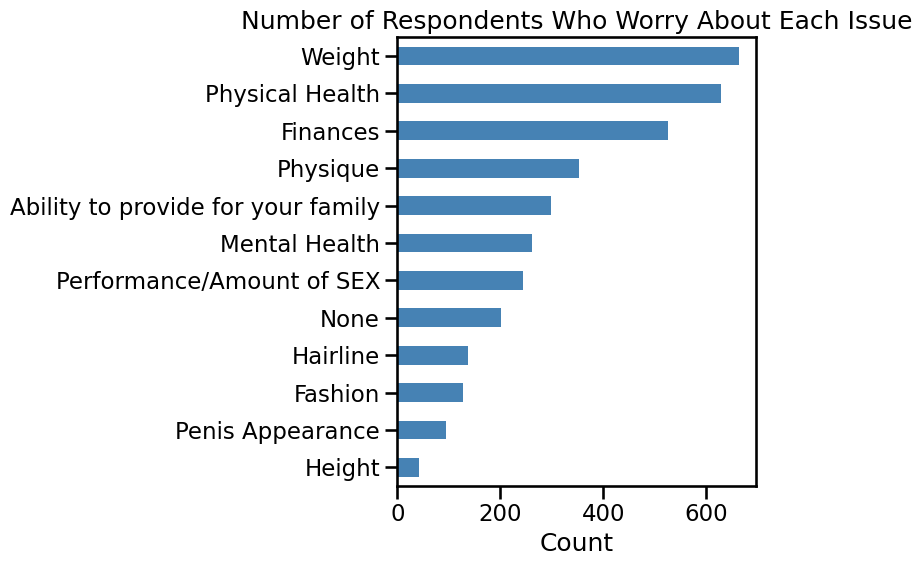

In [18]:
q8_labels = {
    'q0008_0001': 'Height',
    'q0008_0002': 'Weight',
    'q0008_0003': 'Hairline',
    'q0008_0004': 'Physique',
    'q0008_0005': 'Penis Appearance',
    'q0008_0006': 'Fashion',
    'q0008_0007': 'Performance/Amount of SEX',
    'q0008_0008': 'Mental Health',
    'q0008_0009': 'Physical Health',
    'q0008_0010': 'Finances',
    'q0008_0011': 'Ability to provide for your family',
    'q0008_0012': 'None'
}

q8_cols = list(q8_labels.keys())
q8_counts = df[q8_cols].sum().rename(index=q8_labels).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8,6))
q8_counts.plot.barh(ax=ax, color='steelblue')
ax.set_title("Number of Respondents Who Worry About Each Issue")
ax.set_xlabel("Count")
plt.tight_layout()
plt.show()

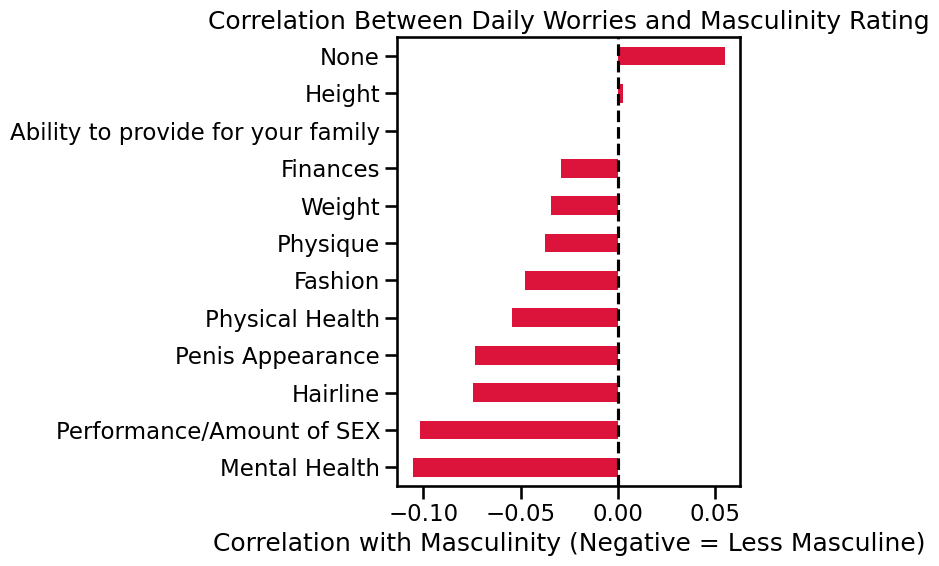

In [24]:
from scipy.stats import pointbiserialr
df['self_masculinity'] = df['self_masculinity'].astype('category')
masc_numeric = df['self_masculinity'].cat.codes

correlations = {
    col: pointbiserialr(df[col], masc_numeric).correlation
    for col in q8_cols  # excludes 'None of the above'
}


q8_labels = {
    'q0008_0001': 'Height',
    'q0008_0002': 'Weight',
    'q0008_0003': 'Hairline',
    'q0008_0004': 'Physique',
    'q0008_0005': 'Penis Appearance',
    'q0008_0006': 'Fashion',
    'q0008_0007': 'Performance/Amount of SEX',
    'q0008_0008': 'Mental Health',
    'q0008_0009': 'Physical Health',
    'q0008_0010': 'Finances',
    'q0008_0011': 'Ability to provide for your family',
    'q0008_0012': 'None'
}

corr_series = pd.Series(correlations).rename(index=q8_labels).sort_values()

plt.figure(figsize=(8,6))
corr_series.plot.barh(color='crimson')
plt.axvline(0, color='black', linestyle='--')
plt.title("Correlation Between Daily Worries and Masculinity Rating")
plt.xlabel("Correlation with Masculinity (Negative = Less Masculine)")
plt.tight_layout()
plt.show()


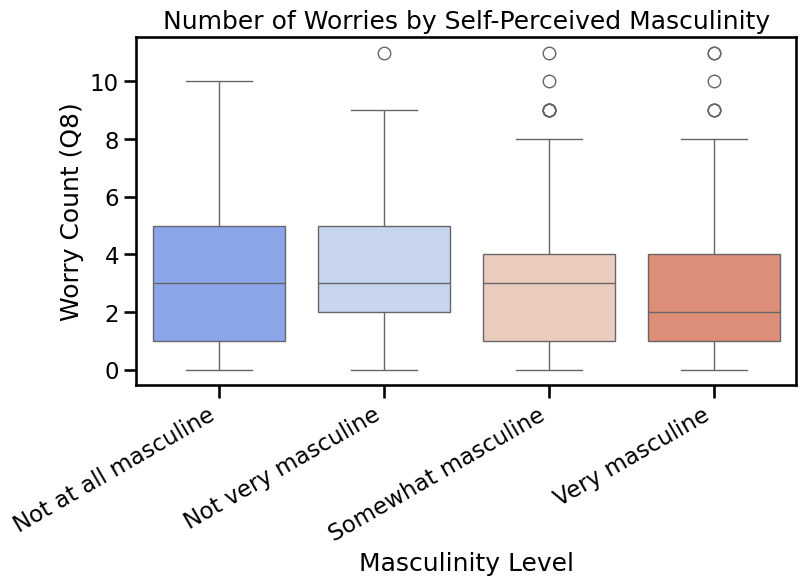

In [36]:
q8_cols = [col for col in df.columns if col.startswith('q0008_') and col != 'q0008_0012']

df['worry_count'] = df[q8_cols].sum(axis=1)


plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='self_masculinity', y='worry_count', hue='self_masculinity',palette='coolwarm', legend=False)
plt.title("Number of Worries by Self-Perceived Masculinity")
plt.xlabel("Masculinity Level")
plt.ylabel("Worry Count (Q8)")
plt.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.show()